# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [190, 391, 213]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16936,6250,1981,7332,118,64
1,2647,2761,2313,907,95,1827
2,3317,6602,6861,1329,3961,1215


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

For this question I compare the sample data with the summary data that is returned from the function call data.describe() rather than the mean values quoted in the cell just above this one.

The 1st customer (with index = 190) makes purchases near or above the 75th percentile for Fresh and Frozen products. This customer also buys more Milk products than the median, hovering around the 60th percentile. In the Detergents_Paper and Delicatessen categories, this customer makes purchases falling below the 25th percentile. This customer could be a grocery store that focuses on selling fresh foods and that has a substantial freezer section for other frozen food items, but that does not have space for non-perishable (ie canned or bagged) food items. The customer could also be a wholesale food distributor.

The 2nd customer (with index = 391) makes purchases that are below the median purchase amount for every category except Delicatessen. This customer is probably a delicatessen, but not necessarily the kind that makes meals for customers since this customer makes small purchases in the fresh foods and detergents_paper categories.

The 3rd customer (with index = 213) purchases Detergents_Paper products in the 75th percentile. The customer also makes purchases exceeding the median for Grocery, Milk, and Delicatessen. This customer also purchases Fresh products near the 25th percentile and Frozen just below the median. This customer appears to be a fast food restaurant, cafe, or other type of consumer-focused business that serves customers. It may utilize paper products (ie napkins), perhaps makes milk shakes or other dairy-based foods, and serve pre-made foods such as deli meats and/or canned food items.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(labels = 'Detergents_Paper', axis = 1, inplace = False)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 1)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print('The prediction score on the test set is {:.2f}'.format(score))

The prediction score on the test set is 0.72


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* The feature that I attempted to predict is 'Detergents_Paper'
* The reported prediction score (ie, R^2) is 0.72. This means that about 72% of the variance in the 'Detergents_Paper' variable is predicted by the remaining features.
* Considering that the prediction score here is 0.72, which is moderately high, I would say that 'Detergents_Paper' may not be necessary for identifying customers' spending habits. This feature can be predicted moderately well using the other features. Consequently, a feature reduction technique may be useful for this data set.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

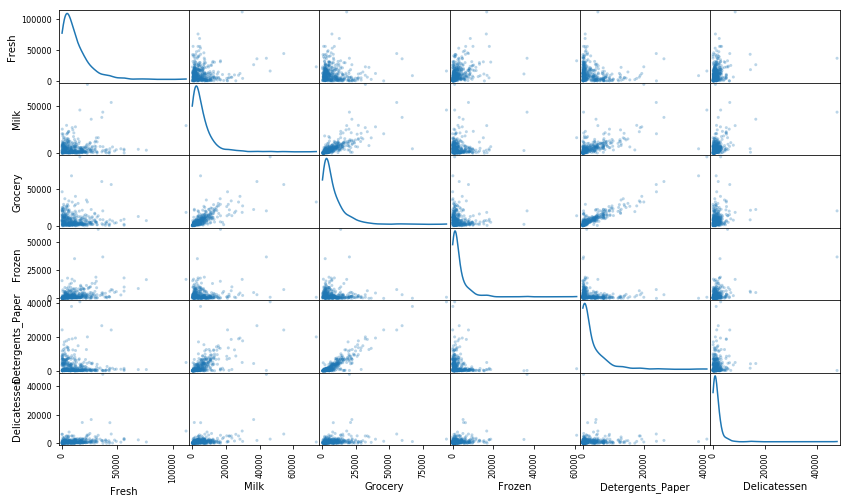

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

* The diagonal elements / frames of the scatter matrix indicate that none of the features are normally distributed. In fact, none of the distributions is symmetric. Each appears to be a left-leaning uni-modal distribution with a large number of data points concentrated close to 0 and a smattering of values in the far right-reaching tail. These values could be considered outliers, or at the very least low-probability of occurence under the true distribution. Histograms overlayed with estimated distributions for 'Fresh' and 'Frozen' are displayed below; it is pretty clear that these are not normal distributions. However, these do resemble a  [Beta($\alpha$,$\beta$)](https://en.wikipedia.org/wiki/Beta_distribution) distribution with $\alpha = 2$ and $\beta = 5$ 


(the remainder of the response to this question is continued below...)

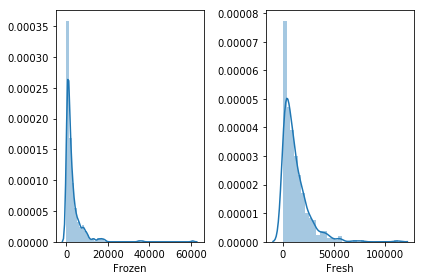

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure()
plt.subplot(1,2,1)
sns.distplot(data['Frozen'])

plt.subplot(1,2,2)
sns.distplot(data['Fresh'])

plt.tight_layout()
plt.show()

* There are definitely pairs of features which exhibit some degree of correlation. These pairs are: Milk & Grocery, Milk & Detergents_Paper, and Grocery & Detergents_Paper.  A quick glance at the Pearson correlation matrix reveals that there is nearly zero (or at least very small) correlation between Detergents_Paper & Fresh, Detergents_Paper & Frozen, and Frozen & Grocery. All remaining pairs of features show small correlations with values less than 0.4

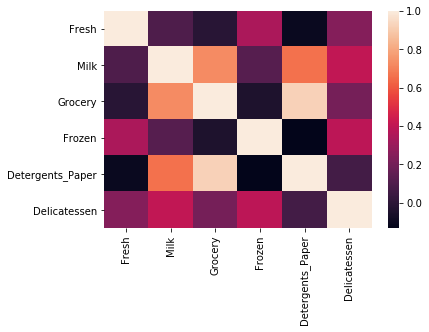

In [7]:
feature_correlations = data.corr(method = 'pearson')
sns.heatmap(feature_correlations)

* The Pearson correlation coefficients between Detergents_Paper and the remaining features are printed below. The Pearson correlation coefficients are 0.66 for 'Detergents_Paper' & 'Milk' and 0.92 for 'Detergents_Paper' & 'Grocery'.  These values confirm my suspicion that 'Detergents_Paper' is not a terribly relevant feature for determining customer segments since it has strong correlations with 'Milk' and 'Grocery'.

In [8]:
print(feature_correlations['Detergents_Paper'])

Fresh              -0.101953
Milk                0.661816
Grocery             0.924641
Frozen             -0.131525
Detergents_Paper    1.000000
Delicatessen        0.069291
Name: Detergents_Paper, dtype: float64


* The probability distributions for 'Grocery', 'Detergents_Paper', and 'Milk' are shown below. They are left-leaning, unimodal distributions with a large number of values near 0 and a tail on the right side. These are clearly not normal distributions. As mentioned above, they do appear similar to beta distributions.

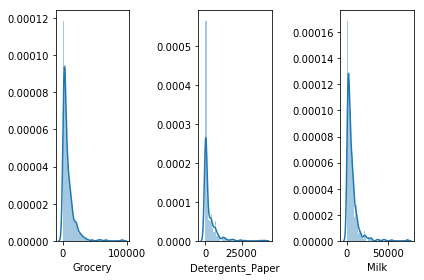

In [9]:
import seaborn as sns
plt.figure()
plt.subplot(1,3,1)
sns.distplot(data['Grocery'])

plt.subplot(1,3,2)
sns.distplot(data['Detergents_Paper'])

plt.subplot(1,3,3)
sns.distplot(data['Milk'])

plt.tight_layout()
plt.show()

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

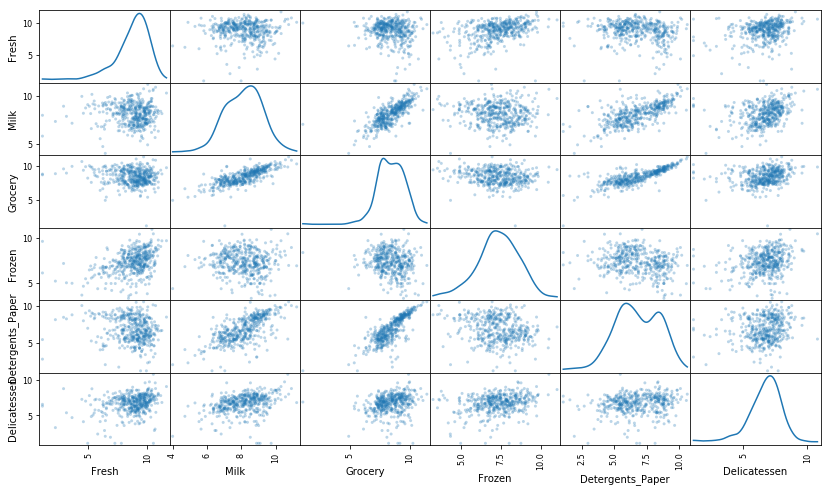

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

____

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).



 ** RESPONSE: Here is a heatmap of the Pearson correlation coefficients matrix AFTER logarithmic transformation **

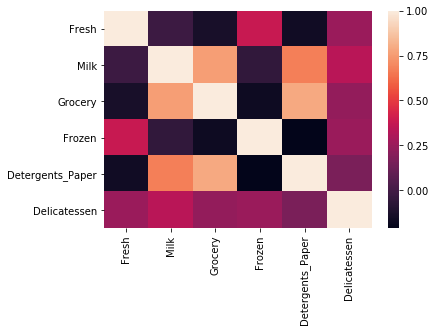

In [11]:
feature_correlations_logd = log_data.corr(method = 'pearson')
sns.heatmap(feature_correlations_logd)

** As a reminder, the heatmap of the Pearson correlation coefficients before logarithmic transformation is presented below: **

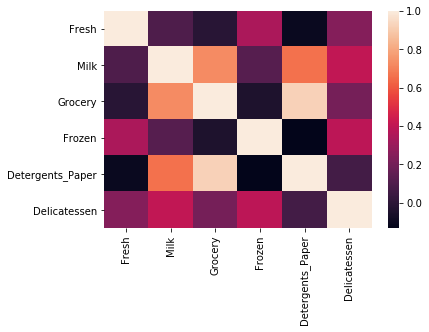

In [12]:
sns.heatmap(feature_correlations)

_____

** It appears that the correlation coefficients change somewhat after logarithmic transformation, and that generally the correlations between variables remain the same. Two examples are demonstrated below. Here are the correlation coefficients before and after logarithmic transformation for 'Detergents_Paper'. The Pearson Correlation Coefficient between 'Detergents_Paper' and 'Grocery' reduces from an original value of 0.92 down to about 0.80. Again, the correlation remains, even if it is slightly reduced. For 'Detergents_Paper' and 'Fresh' the small correlation value of -0.10 increases in magnitude to about 0.16, which is still a small correlation. Overall, the general pattern of the correlations remain: weak correlations remain weak, and strong correlations remain strong. **

In [13]:
print("Pearson Correlation Coefficients for 'Detergents_Paper' BEFORE Log Transform:")
print(feature_correlations['Detergents_Paper'])
print("\n"*2)
print("Pearson Correlation Coefficients for 'Detergents_Paper' AFTER Log Transform:")
print(feature_correlations_logd['Detergents_Paper'])

Pearson Correlation Coefficients for 'Detergents_Paper' BEFORE Log Transform:
Fresh              -0.101953
Milk                0.661816
Grocery             0.924641
Frozen             -0.131525
Detergents_Paper    1.000000
Delicatessen        0.069291
Name: Detergents_Paper, dtype: float64



Pearson Correlation Coefficients for 'Detergents_Paper' AFTER Log Transform:
Fresh              -0.155871
Milk                0.677942
Grocery             0.796398
Frozen             -0.211576
Detergents_Paper    1.000000
Delicatessen        0.166735
Name: Detergents_Paper, dtype: float64


** Here are the Pearson Correlation Coefficients for 'Milk'  before and after logarithmic transformation. Just like 'Detergents_Paper', the general correlation pattern is similar before and after transformation. The correlation between 'Milk' and 'Fresh' reduces from very small correlation (0.10) to just about no correlation (-0.02), which is effectively about the same as before. **

In [14]:
print("Correlations for Milk BEFORE Log Transform:")
print(feature_correlations['Milk'])
print("\n"*2)
print("Correlations for Milk AFTER Log Transform:")
print(feature_correlations_logd['Milk'])

Correlations for Milk BEFORE Log Transform:
Fresh               0.100510
Milk                1.000000
Grocery             0.728335
Frozen              0.123994
Detergents_Paper    0.661816
Delicatessen        0.406368
Name: Milk, dtype: float64



Correlations for Milk AFTER Log Transform:
Fresh              -0.019834
Milk                1.000000
Grocery             0.758851
Frozen             -0.055316
Detergents_Paper    0.677942
Delicatessen        0.337833
Name: Milk, dtype: float64


**Summarized Response**:

The logarithmic transformations do make the distributions appear more normal than they originally appeared. The transformed distributions now have a central peak with tails on left and right sides.

The heatmaps presented above reveal that the correlation between 'Detergents_Paper' and 'Milk' is still present after logarithmic transformation. This particular correlation is increased very slightly from 0.66 to 0.68. The correlation between 'Detergents_Paper' and 'Grocery' is slightly weaker after transformation, having reduced from 0.92 to 0.80. The correlation between 'Milk' and 'Grodery' increased slightly from 0.73 to 0.76.

The heatmaps presented above indicate that the correlation coefficients are mostly similar before and after logarithmic transformation.

____________________________________________________________________

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.737197,8.740337,7.591357,8.900004,4.770685,4.158883
1,7.881182,7.923348,7.746301,6.810142,4.553877,7.510431
2,8.106816,8.795128,8.833608,7.192182,8.284252,7.102499


In [16]:
# Just as a reminder, here are the original (non-transformed) sample data:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16936,6250,1981,7332,118,64
1,2647,2761,2313,907,95,1827
2,3317,6602,6861,1329,3961,1215


It's pretty clear that the natural logarithm draws the data values closer together, which is what causes the distribution to appear more like a 'normal' distribution.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [17]:
posts = {}
df_outliers = pd.DataFrame()
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(a = log_data[feature],q = 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(a = log_data[feature],q = 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)

    # store the fence posts
    posts[feature] = [Q1 - step, Q3 + step]
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    tukey_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]    
    df_outliers = df_outliers.append(tukey_outliers)
    display(tukey_outliers, verify_integrity = True)
#    outliers.append(tukey_outliers)

# NOTE: I have commented the code below and have moved it further down in this notebook. The reason is that I want 
#       to create visualizations of the distributions to help me decide which data points are obvious outliers and which are not.

# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = []

# Remove the outliers, if any were specified
#good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


_____

Here is a dataframe containing all of the potential Tukey outliers:

In [18]:
df_outliers.drop_duplicates(inplace = True)
df_outliers.sort_index(inplace = True)
display(df_outliers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802


Here are plots of the density estimates along with the fence posts (red) used for determining outliers via Tukey's Method: 

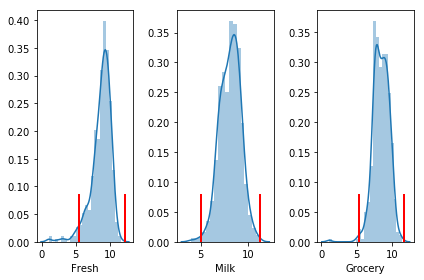

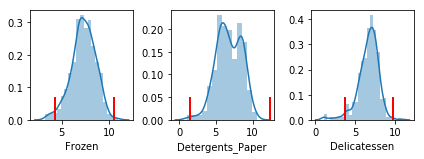

In [19]:
# Plot the data distributions and corresponding fence posts (red)
NUM_SUBPLOTS = 3
row = 1
column = 1
plots_drawn = 0

plt.figure()
for feature in log_data.keys():
    plt.subplot(row,NUM_SUBPLOTS,column)
    sns.distplot(log_data[feature])
    sns.rugplot(a = posts[feature], height = 0.2, color = 'r', linewidth = 2)
    plots_drawn += 1
    column = max(1, (column % NUM_SUBPLOTS) + 1)
    row = row + (column == 1)
    if(column == 1):
        plt.tight_layout()
        plt.show()
        plt.figure()

----------------------------------------------------------------------------------------

It appears that eliminating all data points which reside outside the Tukey fence posts will sharply cut-off the tails in each of the distributions. I do not like that idea since often distributions do have tails which slowly decay to zero. It does appear, however, that 'Grocery' has an "obvious" outlier near the value 2. I have created a table that shows all data points residing below the first fence post. Also, a larger version of the transformed distribution is displayed with the two red fenceposts. 

In [20]:
feature = 'Grocery'
display(log_data[(log_data[feature] >= Q1 - step) & (log_data[feature] <= Q1)])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
131,7.650169,6.378426,5.749393,5.846439,4.248495,5.736572
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
275,6.522093,7.383989,5.407172,6.759255,4.564348,5.937536
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


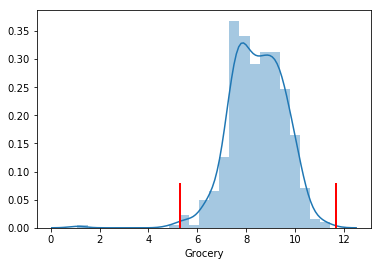

In [21]:
sns.distplot(log_data[feature])
sns.rugplot(a = posts[feature], height = 0.2, color = 'r', linewidth = 2)

The Tukey outliers near the coordinate (12,0) seem acceptable to me. They appear to be a 'natural' part of the right tail that asymptotically approaches a probability of 0. It appears that the red Tukey fencepost near (5.5,0) cuts off the left-tail of the distribution. Eliminating all points below this first fencepost seems too aggressive since, again, many distributions have tails that decay to zero. To me, a natural cut-off point would be at the value (4,0). Using this reasoning, there would be exactly one outlier if 'Grocery' were the only variable to describe these data. This outlier has an index of 75. However, a display of the entire data point (shown below) in the original scale reveals that this customer makes large purchases in Fresh and Frozen. It certainly appears that this customer's Grocery and Detergents_Paper purchase amounts are anomalous, but the purchase amounts in the other categories are reasonable. Consequently, this record will not be excluded.

In [22]:
# Filter the data points with 'Grocery' less than 4.0
display(log_data[log_data['Grocery'] < 4.0])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


In [23]:
display(data.loc[75])

Fresh               20398
Milk                 1137
Grocery                 3
Frozen               4407
Detergents_Paper        3
Delicatessen          975
Name: 75, dtype: int64

----------------------------------------------------------------

Looking at the distributions for each feature is one approach, but doing so only takes into consideration only one component of each data point. Another approach is to look at the distribution of the total value of purchases for all categories. Here is an estimated distribution of the Total purchases (ie sum of amounts for all features), after logarithmic transformation. There appears to be one peak and two tails (left and right).

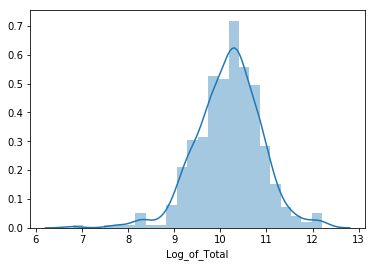

In [24]:
data_copy = data.copy(deep=True)
data_copy['Log_of_Total'] = np.log(data_copy.sum(axis = 1))
sns.distplot(data_copy['Log_of_Total'])

There seems to be an outlier observation just below the value 7.5. A simple filter operation reveals that this observation has an index of 154 (filter operation shown below).

In [25]:
display(data_copy[data_copy['Log_of_Total'] < 7.5])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Log_of_Total
154,622,55,137,75,7,8,6.806829


----------------------

Based on the figure above, it seems that a natural cutoff for the left and right tails of the 'Log_of_Total' distribution (where Total is the sum total of the other features) are approximately 7.5 and 12.5, respectively. These are the locations where the 'Log_of_Total' distribution decays to zero. Consequently, using these cutoff values the observation with a Log_of_Total = 6.8 (index = 154) would be an outlier and could be removed. This is one of the observations which was identified above as having three Tukey outlier features. A quick peak at the original purchase amounts reveals that this sample point contains many low values for all of the features. It seems reasonable to consider this data point as an outlier that can be removed.

In [26]:
display(data.loc[154])

Fresh               622
Milk                 55
Grocery             137
Frozen               75
Detergents_Paper      7
Delicatessen          8
Name: 154, dtype: int64

In [27]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* There are five points which the Tukey method identifies as potential outliers for more than one feature. Here are their indices and features for which they are potential outliers:

 Index 65: Fresh, Frozen

 Index 66: Fresh, Delicatessen

 Index 75: Grocery, Detergents_Paper
 
 Index 128: Fresh, Delicatessen 
 
 Index 154: Milk, Grocery, Delicatessen


* Just because a data point has an outlier feature for one or two features does not necessarily mean that it should be completely removed from the data set. While these outlier values may be anomalous, they are not necessarily non-truthful. It may be logical to examine each of these data points comprehensively. This can be done by looking at all of its feature values to determine how many times the data point appears to be abnormal.


* After some examination (above), the only observation which I would remove from the data set has index of 154. This customer's purchase amounts are low in all categories leading to an anomalous sum total of purchases (explained above using a figure). The remaining four observations which have Tukey outlier features for two features will not be removed. While those data points have outlier values for two features, the values for the remaining four features are not anomalous. In fact the remaining values seem quite typical, residing close to the mean of each distribution. The mixture of outlier and non-outlier feature values could be useful for enriching the classification model.


* Keeping points which have been identified as Tukey outliers for multiple features may cause trouble for k-means, because these outlier points would potentially reside far away from the rest of the data, especially in multiple dimensions (e.g., curse of dimensionality). A K-Means algorithm operating on a low-dimensional data set, however, would benefit from the exclusion of outliers. Utilizing a Gaussian Mixture Model may be useful here, since those models have left and right probability tails that could describe data points having features with low-likelihood of occurence.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

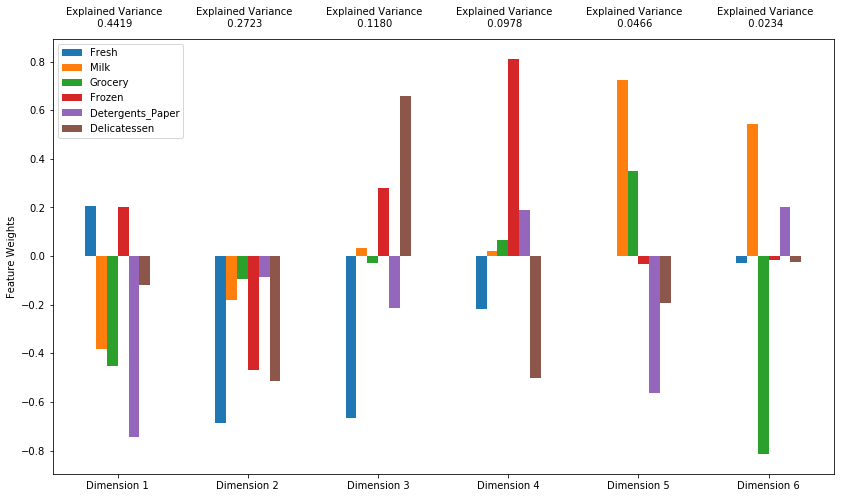

In [28]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components = 6, whiten = True, random_state = 0)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* The first and second principal components together explain 71.42% of the total variance (ie, 0.4419 + 0.2723).


* The first four principal components altogether explain 93% of the variance in the data (ie, 0.4419 + 0.2723 + 0.1180 + 0.0978).


* The first dimension explains about 44.19% of the total variance. This dimension best represents Detergents_Paper, followed by Grocery and Milk.

  The second dimension explains 27.23% of the total variance, lending to a cumulative total variance of about 71.42% at this stage. All weights are negative here, and Fresh is best representated by this second dimension. Delicatessen and then Frozen have fairly strong representation in this dimension as well.
  
  The third dimension explains 11.80% of the total variance, leading to a cumulative total explained variance of 83.22% at this stage. This dimension best represents Delicatessen, which has the largest weight of about 0.65. Note: Fresh has a strong negative component in this dimension as well.

  The fourth dimension explains about 9.78% of the total variance, leading to a cumulative total explained variance of 93% at this stage. Frozen is best represented by this fourth dimension, and it has a feature weight of about 0.80.
  
  The fifth dimension explains about 4.66% of the total variance, leading to a cumulative total explained variance of 97.66% at this stage. Milk is best represented by this dimension.
  
  The sixth dimension explains about 2.34% of the total variance, leading to a cumulative total explained variance of 100% at this stage. Grocery is best represented by the sixth dimension. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [29]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1430,0.0009,-1.2351,1.8600,2.4239,1.2370
1,0.7741,0.3990,1.3078,-1.0900,1.0213,0.0392
2,-0.7981,-0.0094,0.3185,0.1478,-0.4238,0.7198


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [30]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2, whiten = True, random_state = 0)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [31]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.1430,0.0009
1,0.7741,0.3990
2,-0.7981,-0.0094


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

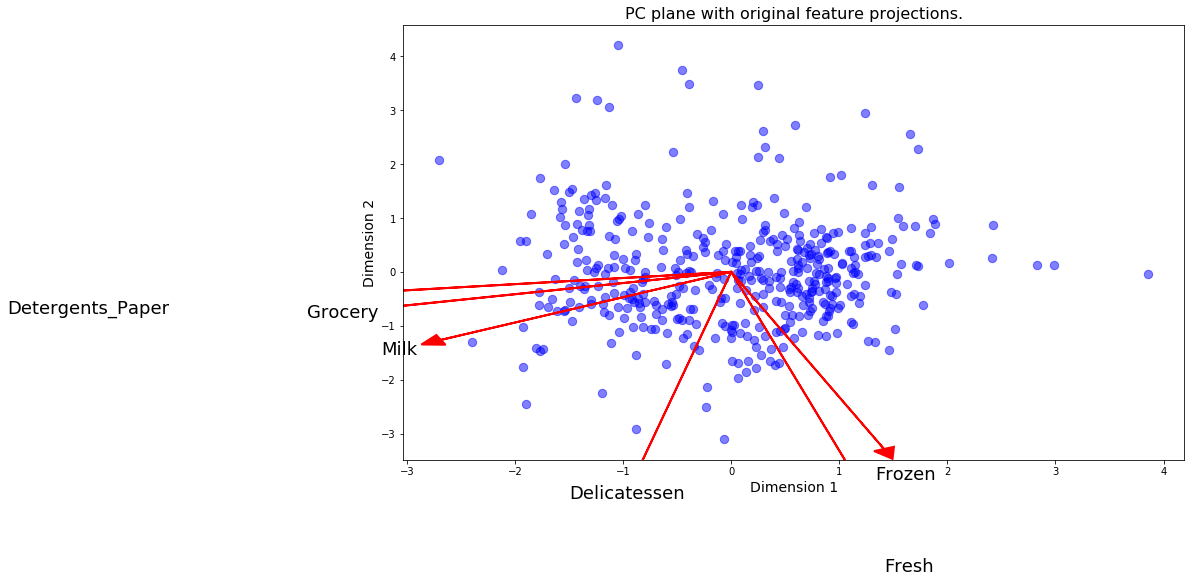

In [32]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

### Response: 

According to the biplot, Detergents_Paper, Grocery, and Milk are most strongly correlated with the first component. Also according to the biplot, Frozen, Fresh, and Delicatessen are most strongly correlated with the second component. These observations/results agree with the pca-results plot obtained above---the weights with the largest magnitude in the first dimension are Detergents, Grocery, and Milk. The weights with the largest magnitude for the second dimension correspond to Frozen, Fresh, and Delicatessen, in that order.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

* The advantages to using a K-Means clustering algorithm are that it scales well to large number of samples, and given enough time the algorithm will always converge (although the result could be a local minimum). It's good for a small number of clusters and when it can be assumed that components have equal covariance.


* The advantages to using a Gaussian Mixture Model clustering algorithm are that it's the fastest algorithm for learning mixture models, and it will not bias the cluster sizes to have specific structures. It's good to use when it's suspected that components have unequal covariance.


* I will use the soft clustering Gaussian Mixture Model because the univariate distribution plots of the transformed customer data indicate that the underlying distribution may be well-represented by Gaussian functions. It's also safe to assume that the covariances of the components are unequal.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusters = range(2,50)
silhouette_coeffs = {key: None for key in clusters}

def gauss_mixture(data, nclusters):
    # DESCRIPTION OF THIS FUNCTION: Given a data set and desired number of clusters, 
    # create a GaussianMixture clusterer. Return clusterer, predictions & centers.
    
    # TODO: Apply your clustering algorithm of choice to the reduced data
    gaussmix = GaussianMixture(n_components = nclusters, warm_start = True, random_state = 0)
    clusterer = gaussmix.fit(data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(data)

    # TODO: Find the cluster centers
    centers = clusterer.means_
    return clusterer, preds, centers

# Create a loop to iterate over several cluster sizes
for num_clusters in clusters:

    # Create Gaussian Mixture Model
    clusterer, preds, centers = gauss_mixture(reduced_data, num_clusters)

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(X = reduced_data, labels = preds)
    silhouette_coeffs[num_clusters] = score

Num Clusters: 2, Silhouette Coefficient: 0.375311447657

Num Clusters: 3, Silhouette Coefficient: 0.376763292705

Num Clusters: 31, Silhouette Coefficient: 0.243422190985

Num Clusters: 49, Silhouette Coefficient: 0.300735750316



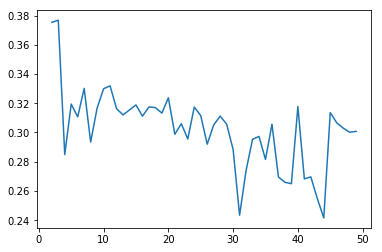

In [34]:
# Print select number of clusters
views = [2,3,31,49]

for view in views:
    print 'Num Clusters: {nc}, Silhouette Coefficient: {sc}'.format(nc = view, sc = silhouette_coeffs[view])
    print ''    

# Plot 'silhouette coefficients' VS 'number of clusters'
# Code for plotting dictionary borrowed from:
# https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values
two_lists = sorted(silhouette_coeffs.items()) # sorted by key, return a list of tuples
clusts, scores = zip(*two_lists)              # unpack a list of pairs into two tuples
plt.plot(clusts, scores)
plt.show()

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* As shown above, the silhouette score was calculated for 48 cluster sizes ranging from 2 to 49 when a Gaussian Mixture Model was utilized. The silhouette scores were 0.375, 0.377, 0.243, and 0.301 for 2, 3, 31, and 49 clusters, respectively. 


* The highest silhouette score was 0.377 when 3 clusters were utilized. However, this is only 0.2% higher than the score obtained with 2 clusters. Given a choice between two options with comparable sihlouette scores, the simpler model is better. In this case, the simpler model uses 2 clusters and that will be the optimal model for the remaining exercises.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

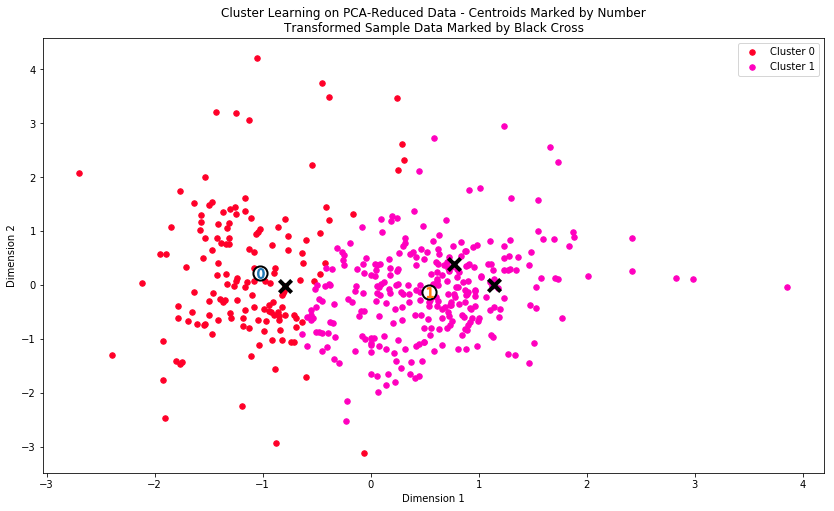

In [35]:
# TODO: Apply clustering algorithm of choice to the reduced data with 3 clusters
clusterer, preds, centers = gauss_mixture(data = reduced_data, nclusters = 2)

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [36]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3019.0,7463.0,12303.0,794.0,4558.0,852.0
Segment 1,9109.0,2242.0,2803.0,2082.0,379.0,763.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Segment 0 is best represented by purchases of Milk, Grocery, and Detergents_Paper in amounts that exceed the mean. These purchases are rather close to the 75th percentile. Purchases of 'Fresh' and Frozen products fall much below the mean, typically near the 25th percentile. Delicatessen purchases are also lower than the mean, falling between the 25th and 50th percentiles. These customers are possibly restaurants, concession stands, or fast-food establishments that sell a lot of dairy products and pre-packaged grocery items, and that utilize a lot of paper products (such as napkins).


Segment 1 is best represented by purchases of Fresh and Frozen products that exceed the median purchase amounts for these categories, but which are slightly less than the mean. Their purchases of Milk, Grocery, and Detergents_Paper fall well below the means and medians for these categories. This customer type is likely to be a mid-sized retail food store focusing on fresh ingredients and frozen items, with a limited supply of non-perishable grocery items.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [37]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


In [38]:
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3019.0,7463.0,12303.0,794.0,4558.0,852.0
Segment 1,9109.0,2242.0,2803.0,2082.0,379.0,763.0


In [39]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16936,6250,1981,7332,118,64
1,2647,2761,2313,907,95,1827
2,3317,6602,6861,1329,3961,1215


**Answer:**

The classification scheme developed here indicates that sample points 0 and 1 (indices 190 and 391 ) are best represented by Segment 1, and that sample point 2 (index 213) is best represented by Segment 0.

The classification for sample 0 seems correct. This sample has substantial purchases in Fresh and Frozen, with Milk and Grocery purchases near the mean, with very small Detergents_Paper purchase amount. Classifying sample 0 as belonging to Segment 1 makes sense.


The classification for sample 1 (as belonging to Segment 1) seems to be based upon comparing purchase amounts against the mean values for Segment 1. This customer purchases Milk, Grocery, and Detergents_Paper in amounts that reside close to the center of Segment 1. Purchases for Fresh and Frozen, however, seem closer to Segment 0 than Segment 1. Perhaps the reason that this sample was classified as Segment 1 is that Milk, Grocery, and Detergents_Paper were shown (above) to be represented by the first principal component.


The classification for sample 2 seems correct. Purchases for Milk, Grocery, and Detergents_Paper are near or exceed the means & medians for each of these categories. This customer also purchases Fresh and Frozen products in amounts that fall below the mean and medians for these two categories. The purchase amounts for Fresh, Milk, Frozen, and Detergents_Paper seem to reside very close to the mean for Segment 0. So, assigning it to Segment 0 seems appropriate.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We cannot assume that the change affects all customers equally. Each customer will have its own delivery preferences and needs. But we can characterize the change on a specific customer as equal to the average impact on the customer's segment. Consequently, we can utilize A/B test to understand which customer segments would be impacted and we can also quantify that impact. We could randomly select 50 customers from each segment and actually invoke the change in delivery service on half of those customers for 10 weeks. So, for each customer segment we would have a subgroup that experiences the change in delivery service and a separate subgroup that does not experience the change. Then, we can compare the average weekly purchase amounts for each product category and utilize a Chi-square test to determine if any of the differences in average weekly purchase amounts for each product categetory is statistically different across the two subgroups for each customer segment. After this analysis has been performed, we will know which customer segments, if any, would be impacted by the change in delivery service. We would also have a quantitative metric to describe the change in service, and we would know which product categories would be affected. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The wholesale distributor can train a classifier, just as we did here, using the database of customers. This classifier would have input features that correspond to the product categories. The classifier would be trained to determine the 'optimal' number of clusters (ie customer segments) and would assign a cluster number to each of the original data points. Consequently, this cluster number would be the target variable, or label, of each of the original data points. 

Using this labeled data set, and the classifier algorithm, the distributor could predict / determine which customer segment that a new customer would belong to, provided that the new customer's anticipated annual spending for each product category is provided.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

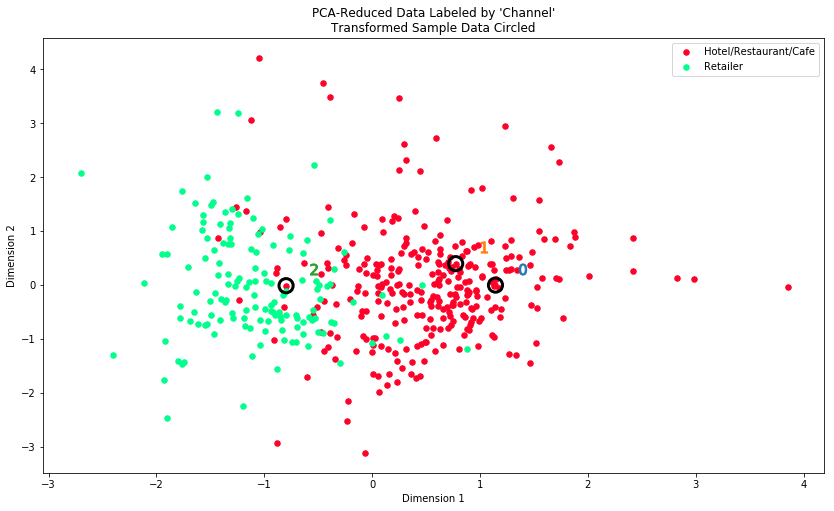

In [40]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* The clustering algorithm that was developed here creates two segments that are remarkably similar to the Hotel/Restaurant/Cafe & Retailer customer distribution presented here. In particular, the boundaries are similar. Ther are some misclassifications that my clustering algorithm would make, but overall the distribution appears to be very similar.


* The two customer segments that my algorithm creates are similar to the distribution presented here. Cluster 0 would most closely resemble the Retailer cluster shown here, and Cluster 1 would most closely resemble Hotel/Restaurant/Cafe. They wouldn't be perfect matches, as there would certainly be misclassifications made by my algorithm.


* I would consider the classifications presented here to be consistent with the two customer segments that were generated above.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.